In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Engineering The First Feature 

The first feature is Average Pixel Used to draw the number in the image. The algorithm below iterates through every row in the data set and sums up all the row's
pixels(collumns) which have a value bigger than 0 (val[col].unique() > 0) and after that devides the sum by the total number of pixels (784)

In [4]:
train['avg_pixel_used'] = np.nan

def avg_pix_usd(data, col_name):

    for i in range(len(data)):

        val = data.iloc[[i], 1:-1]
        counter = 0

        for col in val.columns:

            if val[col].unique() > 0:

                counter += 1

            else: 
                continue

        data.loc[[i], col_name] = counter/784

In [ ]:
avg_pix_usd(train, 'avg_pixel_used')
train.head()

### Engineering The Second Feature 

The second feature is Maximum Pixel Value. Firstly, the algorithm below iterates through every row in the data set and reshapes it into a 28x28 grayscaled image and scales all the pixels to be between 0 and 1 (pixel/255.0). Secondly, it divides the image into 4 sub images and takes the average pixel value for each sub image. Lastly, the maximum pixel value is chosen (like pooling in CNN)

In [ ]:
train['max_pixel_val'] = np.nan

def max_val(data, col_name):
    
    img = data.iloc[:, 1:-2].values.reshape(-1, 28, 28, 1)/255.0
    
    for i in range(len(img)):
        
        sub_img1 = np.average(img[i][:14,:14,0])
        sub_img2 = np.average(img[i][14:,:14,0])
        sub_img3 = np.average(img[i][:14,14:,0])
        sub_img4 = np.average(img[i][14:,14:,0])

        maximum = np.max([sub_img1,sub_img2,sub_img3,sub_img4])

        data.loc[[i], col_name] = maximum

In [ ]:
max_val(train, 'max_pixel_val')
train.head()

### Engineering The Third Feature 

The third feature is Average Pixel Value of the whole image. The algorithm below iterates through every row in the data set, for each row the algorithm adds 
every pixel's value to a list and then takes the average value of that list.

In [ ]:
train['avg_pixel_val'] = np.nan

def avg_pixVal(data, col_name):
    
    for i in range(len(data)):

        pixels = []

        for col in data.iloc[[i], 1:-3].columns:

            pixels.append(col.values)

        data.loc[[i], col_name] = np.average(pixels)

In [ ]:
avg_pixVal(train, 'avg_pixel_val')
train.head()

## Train Test Split

In [9]:
'''
setting ['label'] to categorical data type
'''
train['label'] = train['label'].astype('category', copy=False)

In [10]:
'''
Creating X and y variables of the training data set and another variable for the testing data set
for future machine learning manipulations (scaling, dimension reduction, splitting to train & val sets)
'''
X = train.iloc[:, 1:].values
y = train.iloc[:, [0]].values

In [11]:
'''
checking X and y shapes and values of their first feature
'''


(42000, 786)    pixel0
0       0
(42000, 1)   label
0     1


In [12]:
'''
feature scaling
'''
X[:, :-3] = X[:, :-3]/255.0

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [14]:
'''
creating training set and testing set. The training set is 90% of the whole dataset and the testing set is 10% of the dataset
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [15]:
'''
checking for the shape of the training set and testing set
'''
print(X_train.shape , " ", y_train.shape)
print(X_test.shape, " ", y_test.shape)

(37800, 786)   (37800, 1)
(4200, 786)   (4200, 1)


In [16]:
'''
creating a PCA object with 50 components and applying it on the 784 pixel features
'''
pca = PCA(n_components=50)
components = pca.fit_transform(X_train.iloc[:, :-2])

Text(0.5, 1.0, 'Explained Varience by each PCA component')

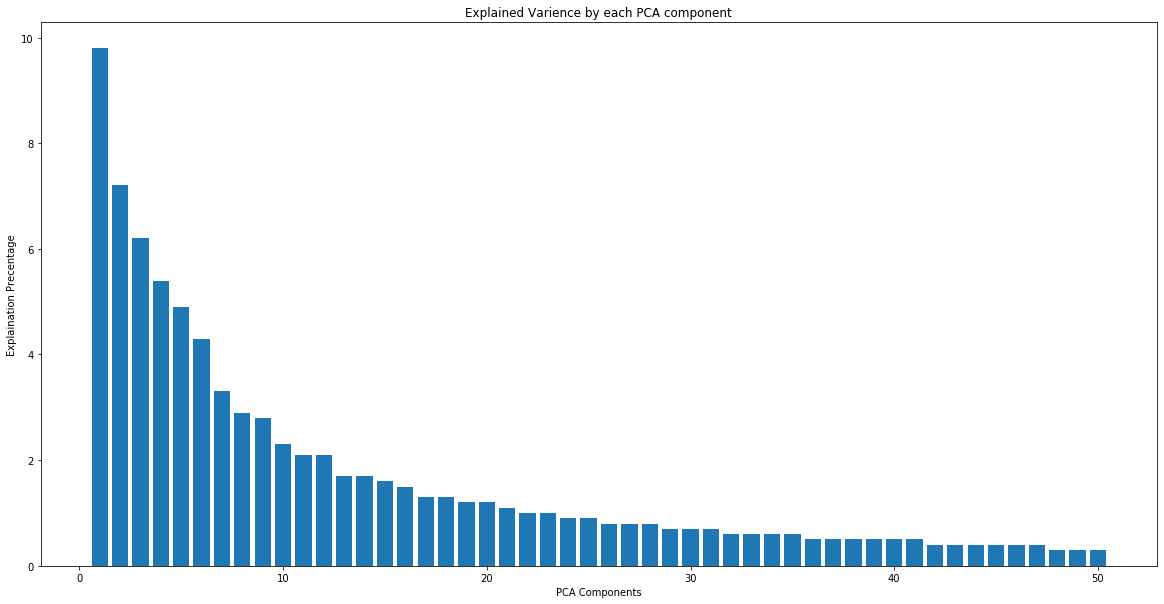

In [17]:
'''
creating a barplot 
'''
plt.figure(figsize=(20,10))
plt.bar(x=range(1, len(np.round(pca.explained_variance_ratio_*100, decimals=1))+1), 
                height=(np.round(pca.explained_variance_ratio_*100, decimals=1)))
plt.ylabel('Explaination Precentage')
plt.xlabel('PCA Components')
plt.title('Explained Varience by each PCA component')

### I decided to use the 6 first PCA components as they all have an explaination of variance above 40%

In [18]:
'''
Creating a copy of X_train, X_test, y_train, y_test in order to avoid warnings and future errors
'''
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

In [19]:
'''
by using a for loop I create 6 PCA features in the training set and fill it with correlated PCA features in components.
'''
for x in range(7):
    X_train_copy['PCA'+str(x)] = components[:, [x]]

X_train_copy.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel783,avg_pixel_val,avg_pixel_used,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
22460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.213080,0.294643,-1.726822,-1.388615,0.724110,-1.552603,0.247249,-0.053166,-1.193206
20828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.139656,0.209184,3.406210,-1.181452,-4.481903,-0.946759,0.434391,0.280305,0.215164
32032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.134109,0.232143,-0.638313,-0.273714,1.293474,1.991359,-0.358137,-2.297643,-0.228064
6194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.206578,0.269133,0.378063,0.018749,2.701631,0.394435,-0.196501,0.477037,-1.530677
12768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.206578,0.269133,-1.799283,-2.683411,-0.388824,3.018143,0.121731,0.518820,1.586110


In [20]:
'''
removing all the pixels features from pixel0 - pixel784
'''
X_train_copy.drop(X_train_copy.columns[:784], axis=1, inplace=True)
X_train_copy.head()

,avg_pixel_val,avg_pixel_used,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
22460,0.213080,0.294643,-1.726822,-1.388615,0.724110,-1.552603,0.247249,-0.053166,-1.193206
20828,0.139656,0.209184,3.406210,-1.181452,-4.481903,-0.946759,0.434391,0.280305,0.215164
32032,0.134109,0.232143,-0.638313,-0.273714,1.293474,1.991359,-0.358137,-2.297643,-0.228064
6194,0.206578,0.269133,0.378063,0.018749,2.701631,0.394435,-0.196501,0.477037,-1.530677
12768,0.206578,0.269133,-1.799283,-2.683411,-0.388824,3.018143,0.121731,0.518820,1.586110


### Applying PCA on the validation set (testing set) 

In [21]:
components_test = pca.transform(X_test.iloc[:, :-2])

In [22]:
for x in range(7):
    X_test_copy['PCA'+str(x)] = components_test[:, [x]]
    
X_test_copy.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel783,avg_pixel_val,avg_pixel_used,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
5457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.213080,0.294643,-1.689639,-1.077460,0.818430,-0.018164,1.691524,0.754043,0.650173
38509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.083278,0.123724,-3.658990,-1.678592,-0.040915,1.068475,-2.271372,-0.128501,-0.143147
25536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.130147,0.198980,-2.131769,2.387969,-0.300405,-2.370318,0.269965,-1.138592,0.654288
31803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.130147,0.198980,-0.367633,3.076710,-1.811923,-1.293596,-0.454282,-0.727356,-0.787954
39863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.213080,0.294643,-0.844067,-0.388040,1.441638,-2.204379,1.056335,0.407559,-1.547049


In [23]:
X_test_copy.drop(X_test_copy.columns[:784], axis=1, inplace=True)
X_test_copy.head()

,avg_pixel_val,avg_pixel_used,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
5457,0.213080,0.294643,-1.689639,-1.077460,0.818430,-0.018164,1.691524,0.754043,0.650173
38509,0.083278,0.123724,-3.658990,-1.678592,-0.040915,1.068475,-2.271372,-0.128501,-0.143147
25536,0.130147,0.198980,-2.131769,2.387969,-0.300405,-2.370318,0.269965,-1.138592,0.654288
31803,0.130147,0.198980,-0.367633,3.076710,-1.811923,-1.293596,-0.454282,-0.727356,-0.787954
39863,0.213080,0.294643,-0.844067,-0.388040,1.441638,-2.204379,1.056335,0.407559,-1.547049


In [24]:
X_train_copy.to_csv('Engineered_X_train.csv', index=False)
X_test_copy.to_csv('Engineered_X_test.csv', index=False)
y_train_copy.to_csv('X_train_label.csv', index=False)
y_test_copy.to_csv('X_test_label.csv', index=False)